In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from fbprophet import Prophet


In [77]:
data = pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv')

In [78]:
# dropping the required  column in preparation for model training and prediction 
df = data.drop(['Tmax',	'SysLoad',	'GasPrice'], axis = 1)

In [79]:
# initializing splitting here would encumber us from errors when it gets model training and prediction
# this is because some operation being performed before splitting is not compartible with it
train = df.iloc[:2757]
test = df.iloc[len(data)-2757:]

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [28]:
data.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [80]:
# filling the missing value with foward fill
data.fillna(method = 'ffill', inplace = True)

In [ ]:
data.shape

(92016, 5)

In [ ]:
data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [81]:
# converting the datetime object to datetime
data['FullDate'] = pd.to_datetime(data['FullDate'] )

In [82]:
data.set_index('FullDate', inplace = True)

In [72]:
data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [83]:
# daily resampling of dataset
df_daily = data.resample('D').mean()

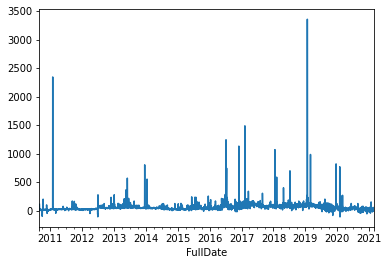

In [84]:
df_daily['ElecPrice'].plot()

In [ ]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose

In [73]:
# getting p-value for SysLoad
sys_result= sts.adfuller(df_daily['SysLoad'])

print(f'p-value:{sys_result[1]}' )   



p-value:0.0042537255045741835


In [74]:
# getting p-value for GasPrice and getting 10% critical value

gas_value = sts.adfuller(df_daily['GasPrice'])

print('Critical Values:')   

for  k, v in  gas_value[4].items():  

    print( f'{k}:{v}' )

Critical Values:
1%:-3.4320693157877544
5%:-2.8622996992165364
10%:-2.5671743978048323


In [85]:
# getting elecprice 5% critical value
adf_p_result = sts.adfuller(df_daily['ElecPrice'])

print('Critical Values:')   

for  k, v in  adf_p_result[4].items():  

    print( f'{k}:{v}' )   

Critical Values:
1%:-3.432066157296446
5%:-2.8622983040036005
10%:-2.5671736550459663


Model Training and Prediction

In [ ]:
pip install localpip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 13.4 MB/s 
     |████████████████████████████████| 93 kB 2.8 MB/s 


In [ ]:
pip install pystan==2.19


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.2 MB 15 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.3 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6271306 sha256=d7887e081b63cf75aa6db301b3969f5b9f0f4d94d5b88bcc65e8f44e03b6a31f
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [36]:
print(train.shape, test.shape)

(2757, 1) (2757, 1)


In [20]:
test.shape

(2757, 1)

In [54]:
# rename column name for test and train data to enable fitting into fbprophet
train.rename(columns ={'FullDate': 'ds', 'ElecPrice':'y'}, inplace= True)
test.rename(columns ={'FullDate': 'ds', 'ElecPrice':'y'}, inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [50]:
train

,ds,y
0,2010-09-01 00:00:00,23.710
1,2010-09-01 01:00:00,22.635
2,2010-09-01 02:00:00,22.565
3,2010-09-01 03:00:00,18.910
4,2010-09-01 04:00:00,18.030
...,...,...
2752,2010-12-24 16:00:00,36.770
2753,2010-12-24 17:00:00,35.060
2754,2010-12-24 18:00:00,27.980
2755,2010-12-24 19:00:00,28.115


MOdel Fitting and Prediction for Univariate




In [51]:
model = Prophet()  
model.fit(train)  

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [85]:
forecast = model.predict(test)  
forecast.head()

In [ ]:
model.plot(forecast)

,Pred
Date,
2010-12-25 20:00:00,1.906914
2010-12-26 20:00:00,9.197418
2010-12-27 20:00:00,18.466030
2010-12-28 20:00:00,18.386164
2010-12-29 20:00:00,29.021235
...,...
2018-07-08 20:00:00,-687.760099
2018-07-09 20:00:00,-678.491487
2018-07-10 20:00:00,-678.571353


In [66]:
def mean_absolute_p_error(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [85]:
# Calulating MAPE
FB_MAPE= mean_absolute_p_error(train['y'],forecast.loc[:, 'yhat']))
print("MAPE: ",FB_MAPE.round(2))

In [ ]:
# Calulating RMSE
import math
MSE = np.square(np.subtract(train['y'],forecast.loc[:, 'yhat'])).mean() 

RMSE = math.sqrt(MSE)
print(RMSE.round(2))

In [63]:
#  plotting the components from the forecasted model

In [ ]:
model.plot(forecast)

MOdel Fitting and Prediction for Multivariate


In [56]:
train['Tmax'] = data['Tmax']
train['SysLoad'] = data['SysLoad']
train['GasPrice'] = data['GasPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [57]:
test['Tmax'] = data['Tmax']
test['SysLoad'] = data['SysLoad']
test['GasPrice'] = data['GasPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [58]:
train.head()

,ds,y,Tmax,SysLoad,GasPrice
0,2010-09-01 00:00:00,23.710,15.8,1688.215,3.69
1,2010-09-01 01:00:00,22.635,15.8,1669.195,3.69
2,2010-09-01 02:00:00,22.565,15.8,1491.980,3.69
3,2010-09-01 03:00:00,18.910,15.8,1330.760,3.69
4,2010-09-01 04:00:00,18.030,15.8,1247.940,3.69


In [61]:
multi_model = Prophet()
multi_model.add_regressor('Tmax')
multi_model.add_regressor('SysLoad')
multi_model.add_regressor('GasPrice')



In [86]:
multi_model.fit(train)
multi_forecast = m.predict(test)  
multi_forecast.head()

In [87]:
# Calculating Multivariate MAPE

FB_multi_MAPE= mean_absolute_p_error(train['y'],forecast.loc[:, 'yhat']))
print("MAPE: ",FB_multi_MAPE.round(2))

In [88]:
# Calculating Multivariate RMSE
multi_MSE = np.square(np.subtract(train['y'],forecast.loc[:, 'yhat'])).mean() 
multi_RMSE = math.sqrt(MSE)
print(multi_RMSE.round(2))

In [88]:
# plotting the multivariate forcasted model
multi_model.plot(multi_forecast)

Predicting with the exclusion of TMAX

In [64]:
train.drop('Tmax', axis =1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [65]:
new_forecast_model = Prophet()
new_forecast_model.add_regressor('SysLoad')
new_forecast_model.add_regressor('GasPrice')

In [85]:
new_forecast_model.fit(train)
new_forecast = new_forecast_model.predict(test)  
new_forecast.head()

In [ ]:
# Calculating Multivariate MAPE

In [86]:
# Calculating Multivariate MAPE
FB_mul_MAPE= mean_absolute_p_error(train['y'],forecast.loc[:, 'yhat']))
print("MAPE: ",FB_mul_MAPE.round(2))